# DALL-E

In [1]:
import os
from tqdm import tqdm
from IPython.display import display, clear_output
from abcli import file
from abcli.modules.cookie import cookie
from abcli.modules import objects
from aiart import html
from openai_cli import NAME, VERSION
from openai_cli.DALLE.canvas import Canvas
from openai_cli.DALLE.brush import TilingBrush

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

Found credentials in shared credentials file: ~/.aws/credentials
using openai_cli-2.73.1.


In [2]:
os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
validation = False
brush_size = 256

In [4]:
_, content = html.ingest_url("https://allpoetry.com/poem/14326890-The-Laughing-Heart-by-Charles-Bukowski")

The Laughing Heart: 20 line(s):
your life is your life
don't let it be clubbed into dank submission.
be on the watch.
there are ways out.
there is a light somewhere.
it may not be much light but
it beats the darkness.
be on the watch.
the gods will offer you chances.
know them.
take them.
you can't beat death but
you can beat death in life, sometimes.
and the more often you learn to do it,
the more light there will be.
your life is your life.
know it while you have it.
you are marvelous
the gods wait to delight
in you.


In [5]:
shape = Canvas.shape(content, brush_size=brush_size)

DALL-E Canvas(25000x25000): not allocated
100%|██████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 41.38it/s]
Canvas.shape: 21 line(s) @ tiling x 256: 968x1328


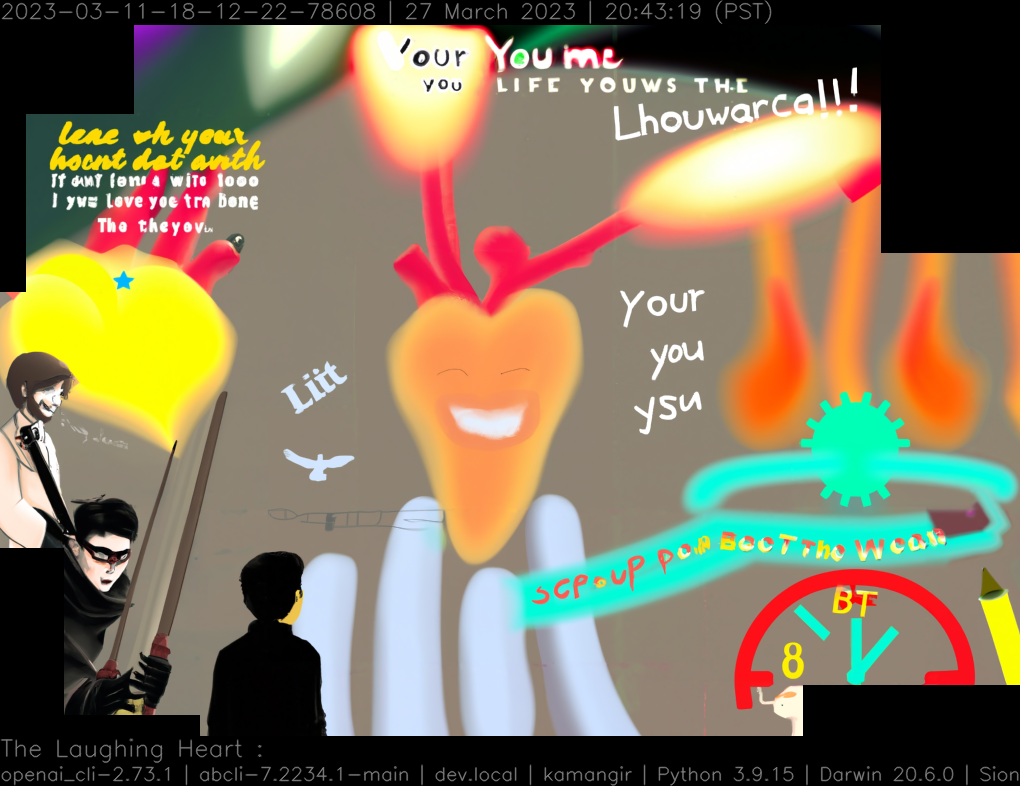

TilingBrush: ring:3 @ 38.38 deg
Canvas -> /Users/kamangir/storage/abcli/2023-03-11-18-12-22-78608/private.png
100%|██████████████████████████████████████████████████████████████████████| 21/21 [03:38<00:00, 10.41s/it]
Canvas -> /Users/kamangir/storage/abcli/2023-03-11-18-12-22-78608/private.png


In [6]:
canvas = Canvas(
    content=content,
    verbose=True,
    brush_size=brush_size)

canvas.render_text(
    canvas.create_brush(brush_size=brush_size),
    content[: 3] if validation else content,
    objects.path_of("DALL-E.png"),
);

---

In [7]:
# END